In [2]:
import json as js
import glob
import sys

In [3]:
import pandas as pd
import numpy as np

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.manifold import TSNE
from sklearn.feature_extraction import text 
from sklearn.cluster import KMeans, MiniBatchKMeans

In [5]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib
%matplotlib inline
import seaborn as sns

In [6]:
import numpy as np
import bokeh.plotting as bp
from bokeh.plotting import save
from bokeh.models import HoverTool

In [7]:
import os
from copy import deepcopy
import time
import datetime

In [1]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/g/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [45]:
additional_stop_words = ['rt','t','http','u','s','follow','m','dm'] ##USE THIS FOR STOP WORDS
stop_words = text.ENGLISH_STOP_WORDS.union(additional_stop_words)

In [9]:
from nltk import word_tokenize
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
from nltk.stem import WordNetLemmatizer 
class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        return [self.wnl.lemmatize(t) for t in tokenizer.tokenize(doc)]

In [122]:
directory = './../tweets/*'

## LOAD TWEET OBJECTS

In [190]:
tweet_objects = []
dirs = glob.glob(directory)
for dr in dirs:
    files = glob.glob(dr+'/*')
    for f in files:
            fin = open(f,'r')
            for line in fin:
                try:
                    dat = js.loads(line)
                    tweet_objects.append(dat)
                except:
                    continue
            fin.close()

## EXTRACT DATA AND EXPORT TO TEMPORARY FILE

In [191]:
fout = open('tmp.dat','w')
for ln in tweet_objects:
    try:
        entities = ln['entities']
        hashtags = entities['hashtags']
        user_mentions = entities['user_mentions']
    except KeyError:
        continue
    for hashtag in hashtags:
        try:
            hashtag = hashtag['text']
            date = ln['created_at']
            date = date.split()
            #print date
            date = str(date[1])+'-'+str(date[2])+'18_'+str(date[3])
            favorite_count = ln['favorite_count']
            user = ln['user']
            followers = user['followers_count']
            username = user['screen_name']
            location = user['location']
            txt = ln['text'].replace('\n','')
            fout.write(date + '\t' + str(favorite_count)+','+str(followers)+',"'+str(username)+'","'+str(location)+'","'+str(txt)+'"\n')
        except UnicodeEncodeError:#.encode('utf-8')
            continue
fout.close()

## OPEN TMP FILE AS DATAFRAME

In [192]:
df = pd.read_csv('tmp.dat',error_bad_lines=False,header=None,names=\
                 ['date','followers','username','location','tweet'],\
                 delimiter=',',index_col=False)#,encoding='utf-8'
df.shape[0]
df.drop_duplicates(inplace=True)

In [193]:
#if rm_duplicates == False:
#    df['rt'] = df['tweet'].str.split(':', expand=True).ix[:,0]
#    df.drop_duplicates(subset=['rt'], keep='first',inplace=True)
#    df.rt.head()
#    df.shape[0]

In [194]:
df.shape[0]

28594

In [195]:
df.head(25)

,date,followers,username,location,tweet
0,Sep-2818_06:04:46\t0,319,monicamallon,"San Francisco Bay Area, CA",Ran 1.91 miles with Nike⁠ Run Club #JustDoIt h...
1,Sep-2818_10:29:07\t0,3437,LndOntRetweets,"London, Ontario",RT @BX93: Turns out @Nike almost dropped @Kaep...
3,Oct-0118_12:00:49\t0,1617,FrohmeD,World,Frohme D. Porche: Colin Kaepernick and Mo'Niqu...
11,Sep-2918_14:26:27\t0,47,Pedro_Meireless,None,RT @Nike: Don’t ask if your dreams are crazy. ...
12,Sep-3018_01:02:31\t0,744,maybekarla,None,thank you Ms. Joey!#WansaManiKenNiMonica
13,Sep-3018_01:15:06\t0,19,reignfall88,Republic of the Philippines,RT @FernandezMadiha: Good morning kiervi..ito...
14,Sep-3018_04:58:38\t0,397,jecalukaaaa,Republic of the Philippines,@TheABSCBNBall WOW. Thank you po #WansaManiKen...
15,Sep-3018_07:15:31\t0,132,aweng021,Republic of the Philippines,RT @VivoreeU: Like and comment:https://t.co/u2...
16,Sep-3018_07:19:21\t0,36,divine51953904,None,RT @Francen09: Adorkable couple hahahaI heart ...
17,Sep-3018_09:01:49\t0,51,betchayly,Republika ng Pilipinas,RT @Martine151993: Cant wait naaaaa#WansaManiK...


## REMOVING TWEETS FROM DATASET

In [196]:
'''
*** Tweets often use popular hashtags with unrelated topics.
*** Certain words can be used in order to filter such tweets.
*** Enter these words below in the bad_terms list.
'''
bad_terms = ['cock','ManiKENniMonica','nudes']
for i in range(len(bad_terms)):
    df.bad = df['tweet'].str.lower().str.contains(bad_terms[i].lower())
    df = df[df.bad == False]

/usr/local/lib/python3.6/site-packages/ipykernel/__main__.py:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
/usr/local/lib/python3.6/site-packages/ipykernel/__main__.py:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
/usr/local/lib/python3.6/site-packages/ipykernel/__main__.py:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access


## TOPIC MODELING WITH LATENT DIRICHLET ALLOCATION

In [197]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))

In [198]:
n_features = 300
n_topics = 10
n_top_words = 10
n_top_tweets = 15
ngrams = 3

In [199]:
count_vectorizer = CountVectorizer(max_df=0.95, min_df=5,max_features=n_features,stop_words=stop_words,\
                                  ngram_range=(1,ngrams),tokenizer=LemmaTokenizer())
countv = count_vectorizer.fit_transform(df.tweet)

In [200]:
lda = LatentDirichletAllocation(n_topics, random_state=0,max_iter=30).fit(countv)

/usr/local/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:508: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


In [201]:
count_feature_names = count_vectorizer.get_feature_names()

In [202]:
lda_embedding = lda.transform(countv)
lda_embedding = (lda_embedding - lda_embedding.mean(axis=0))/lda_embedding.std(axis=0)

In [203]:
top_idx = np.argsort(lda_embedding,axis=0)[-n_top_tweets:]
count = 0
for i, idxs in enumerate(top_idx.T): 
    print("Topic {}:".format(count+1))
    topic = lda.components_[i]
    print(" ".join([str(count_feature_names[i])+'\n' for i in topic.argsort()[:-n_top_words - 1:-1]]))
    for idx in idxs:
        print(df.iloc[idx]['tweet'])
    count += 1
    print('\n\n')

Topic 1:
history
 mad
 protest
 like
 just
 conservative
 end
 nike
 ll
 just like

RT @TPVTrevor: RIP #Nike. Due to the upcoming conservative protests, you'll end up in the dustbin of history just like:-Walmart-Starbuck…
RT @TPVTrevor: RIP #Nike. Due to the upcoming conservative protests, you'll end up in the dustbin of history just like:-Walmart-Starbuck…
RT @TPVTrevor: RIP #Nike. Due to the upcoming conservative protests, you'll end up in the dustbin of history just like:-Walmart-Starbuck…
RT @TPVTrevor: RIP #Nike. Due to the upcoming conservative protests, you'll end up in the dustbin of history just like:-Walmart-Starbuck…
RT @TPVTrevor: RIP #Nike. Due to the upcoming conservative protests, you'll end up in the dustbin of history just like:-Walmart-Starbuck…
RT @TPVTrevor: RIP #Nike. Due to the upcoming conservative protests, you'll end up in the dustbin of history just like:-Walmart-Starbuck…
RT @TPVTrevor: RIP #Nike. Due to the upcoming conservative protests, you'll end up in th

## T-SNE Visualization

In [204]:
topics = [i+1 for i in range(n_topics)]
topics = ['New Nike ad campaign','Ad campaign','Boycott & other']

In [211]:
tsne = TSNE(random_state=0,metric='cosine',init='pca',perplexity=20.0,n_iter=5000) #TODO: TRY DIFFERENT DISTANCE METRICS!!
tsne_embedding = tsne.fit_transform(lda_embedding)
tsne_embedding = pd.DataFrame(tsne_embedding,columns=['x','y'])
tsne_embedding['hue'] = lda_embedding.argmax(axis=1)

In [212]:
cmap = matplotlib.cm.get_cmap('nipy_spectral_r')

In [213]:
colors = []
for i in range(n_topics):
    val = (float(i))/(n_topics-1)
    colors.append(cmap(val))

In [214]:
legend_list = []
for i in range((n_topics)):   
    color = colors[i]
    legend_list.append(mpatches.Ellipse((0, 0), 1, 1, fc=color))

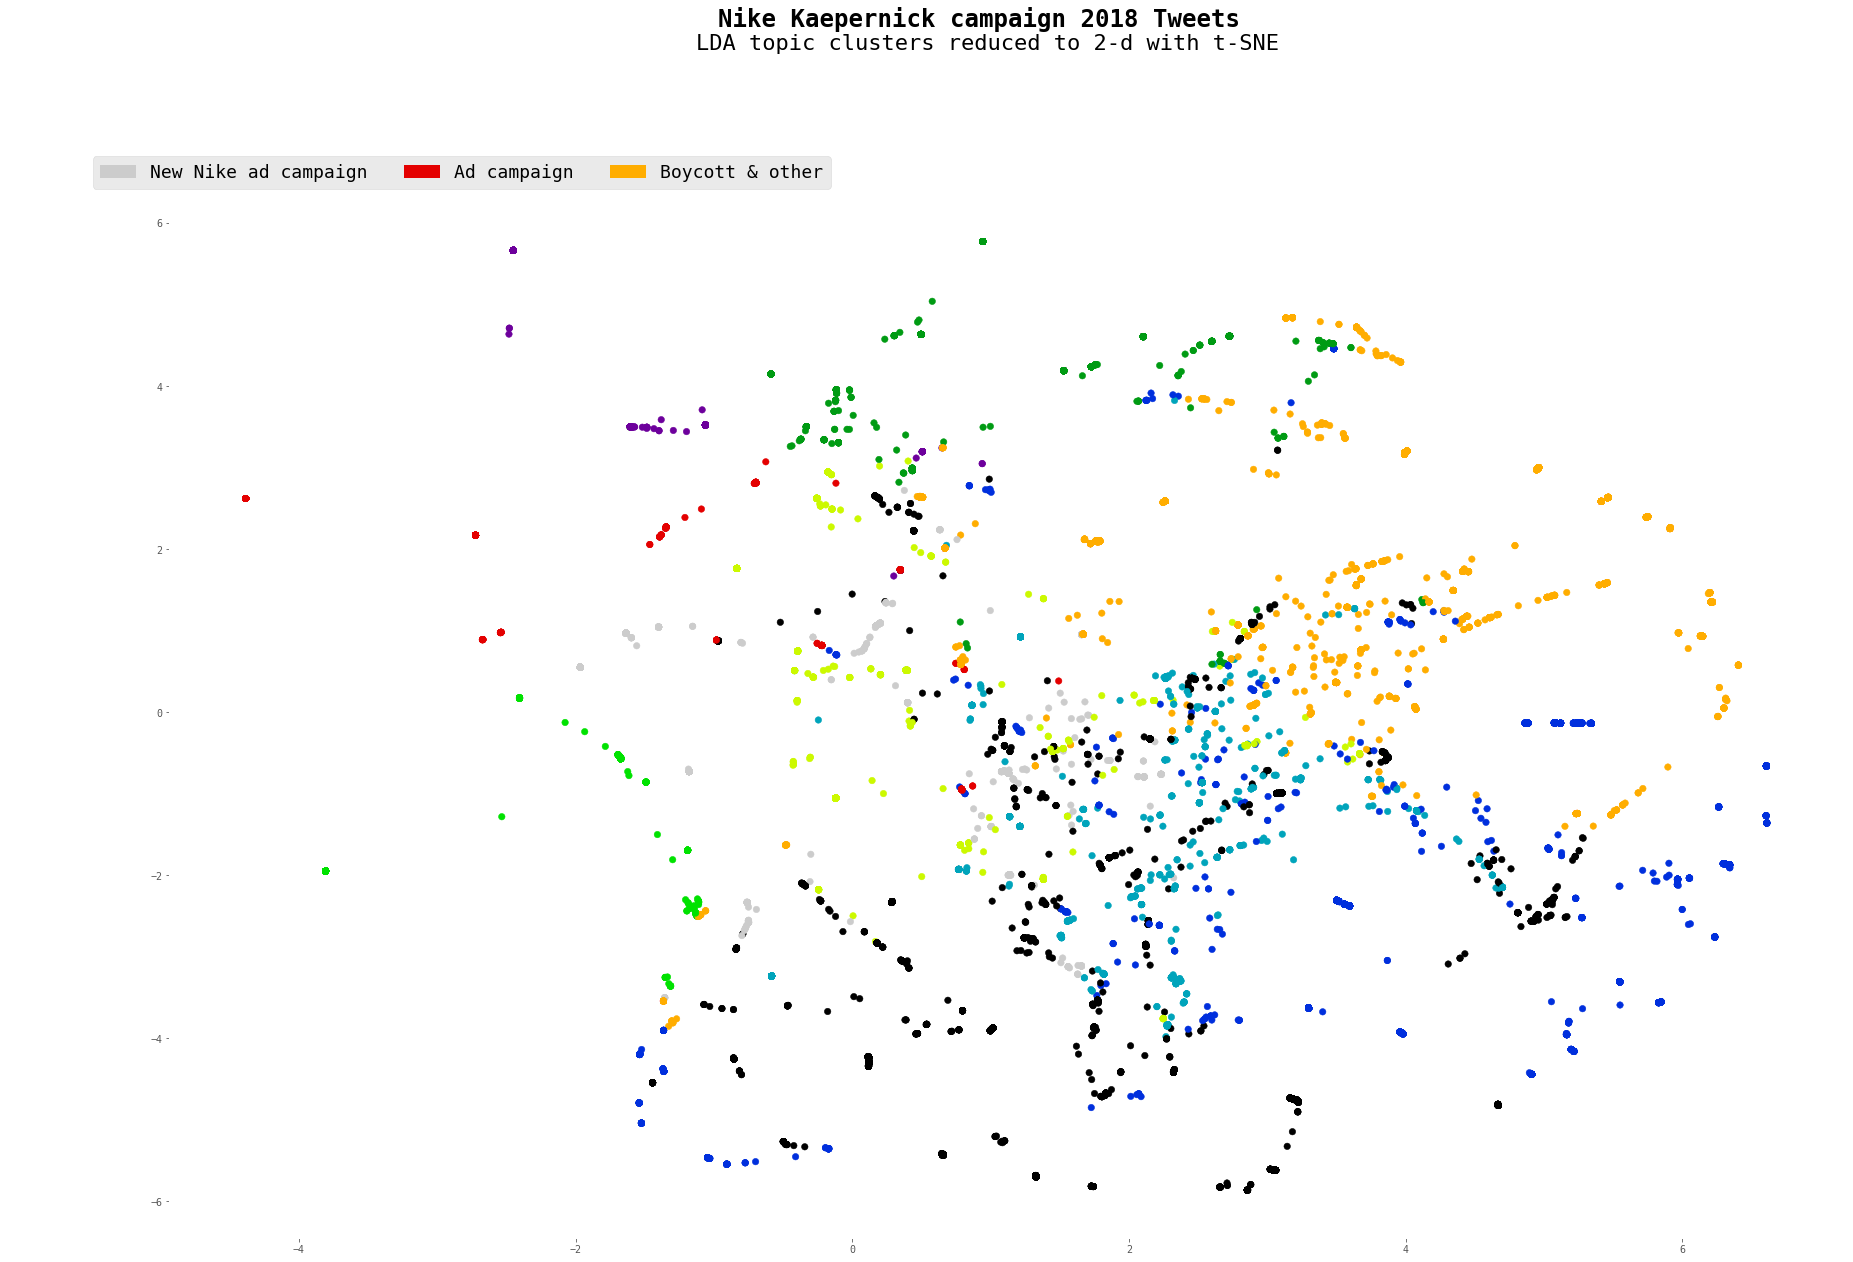

In [215]:
matplotlib.rc('font',family='monospace')
plt.style.use('ggplot')
fig, axs = plt.subplots(1,1, figsize=(30, 20), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .1, wspace=0)
axs.set_facecolor('white')
count = 0
legend = []
data = tsne_embedding
scatter = axs.scatter(data=data,x='x',y='y',s=42,c=data['hue'],cmap='nipy_spectral_r')
plt.suptitle("Nike Kaepernick campaign 2018 Tweets",**{'fontsize':'24','weight':'bold'},ha='center')
plt.figtext(.51,0.95,'LDA topic clusters reduced to 2-d with t-SNE  ', **{'fontsize':'22','weight':'light'}, ha='center')
fig.legend(legend_list,topics,loc=(0.05,0.85),ncol=3,fontsize=18)
plt.subplots_adjust(top=0.85)
plt.show()
#plt.savefig() #enter filename here to save vizualization to file

([<matplotlib.axis.XTick at 0x15638f630>,
 <a list of 3 Text xticklabel objects>)

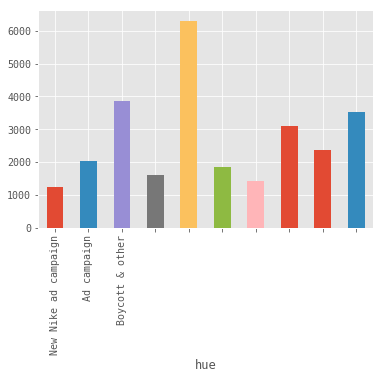

In [216]:
freq = tsne_embedding.groupby('hue').count()
fig, ax = plt.subplots()
indices = [i for i in range(n_topics)]
freq['x'].plot(ax=ax, kind='bar')
plt.xticks(indices, topics)
#plt.savefig('../../ml_lda_clusters_10freq.png',transparent=True)